In [2]:
from utils.binaries import *
from utils.plotting import *

12:19:56 (  +21.7s) [INFO   ] -- import logging
12:19:56 (    +1ms) [INFO   ] -- import numpy as np
12:19:56 (    +5ms) [INFO   ] -- import uncertainties
12:19:56 (    +1ms) [INFO   ] -- import numpy as np
12:19:56 (    +5ms) [INFO   ] -- import uncertainties
12:19:57 (  +202ms) [INFO   ] -- import pandas as pd
12:19:57 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
12:19:57 (    +2ms) [INFO   ] -- import binaries.tools as tools
12:19:57 (  +295ms) [INFO   ] -- import matplotlib.pyplot as plt
12:19:57 (  +372ms) [INFO   ] -- import seaborn as so
12:19:57 (    +2ms) [INFO   ] -- import plotting.tools as plot
12:19:57 (    +6ms) [DEBUG  ] -- font size set to 9.5
12:19:57 (    +1ms) [DEBUG  ] -- label size set to 13.0
12:19:57 (    +1ms) [DEBUG  ] -- figure size set to [6.6, 3.3]
12:19:57 (    +1ms) [DEBUG  ] -- markersize set to 2.0
12:19:57 (    +1ms) [DEBUG  ] -- usetex set to False


In [3]:
from Event import Event


class cfg_class:

    threshold: dict = {
        "wcd": 0.2,
        "ssd": 12,
    }

    occupancy: dict = {
        "wcd": 12,
        "ssd": 0,
    }

    multiplicity: dict = {
        "wcd": 1,
        "ssd": 0,
    }

In [4]:
test = Event("/cr/work/filip/SSDTriggerEfficiency/run01/DAT031134_000000.csv")
print(test)
print(len(test))

Station 4008 at 241m
Station 4002 at 231m
Station 4038 at 1033m
Station 4037 at 644m
Station 4019 at 529m
Station 4079 at 1786m
Station 4062 at 1846m
Station 4003 at 846m
Station 4061 at 939m
Station 4060 at 1289m
Station 4058 at 2471m
Station 4021 at 893m
Station 4020 at 629m
Station 4018 at 1210m

14


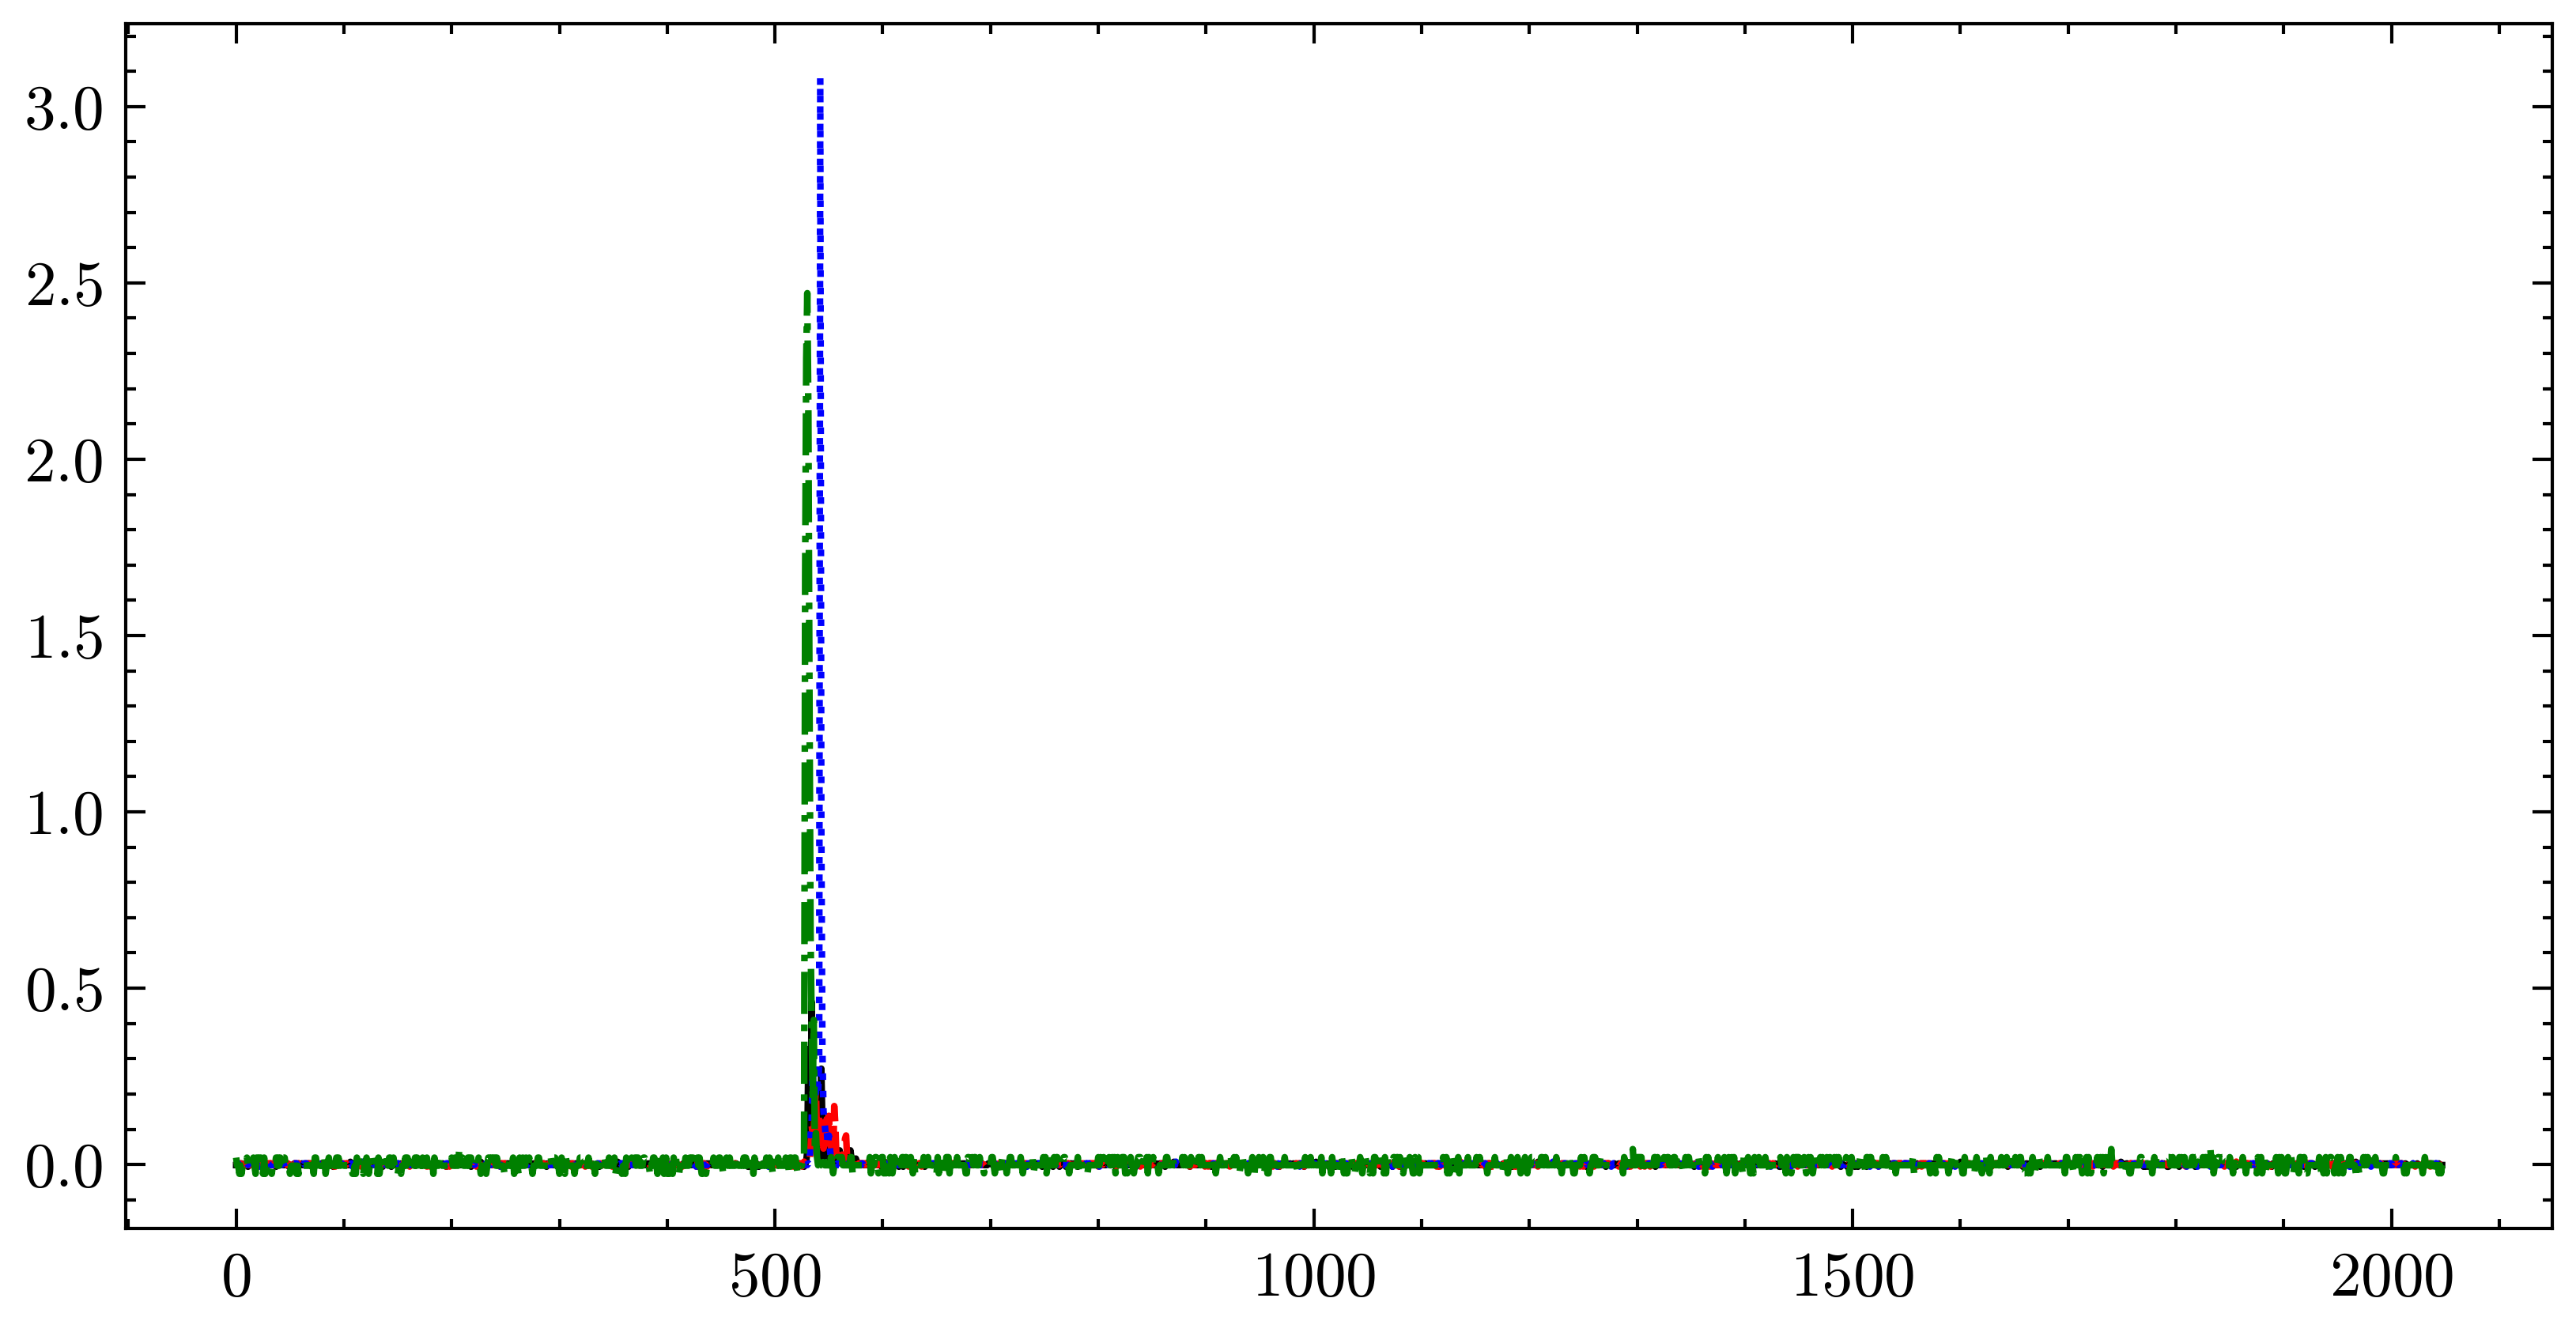

In [6]:
[plt.plot(range(2048), trace) for trace in test[4008].wcd_traces]
plt.plot(range(2048), test[4008].ssd)

# plt.ylim(0, 0.2)
# plt.xlim(500, 1000)

In [ ]:
df1 = pd.read_csv(
    "/cr/work/filip/SSDTriggerEfficiency/run01_evaluated/DAT010002_000000.csv",
    index_col="params",
)
df2 = pd.read_csv(
    "/cr/work/filip/SSDTriggerEfficiency/run01_evaluated/DAT010002_000015.csv",
    index_col="params",
)

In [ ]:
df1

In [ ]:
df2

In [ ]:
df1 += df2

In [ ]:
df1

In [ ]:
def filter_close(col):
    spd = int(col)

    return spd < 750


cols_close = [col for col in df.columns if filter_close(col)]
df_close = df[cols_close]
df_close["sum_close"] = df_close.sum(axis=1, numeric_only=True)
df_close["n_close"] = len(cols_close)
cols_far = [col for col in df.columns if not filter_close(col)]
df_far = df[cols_far]
df_far["sum_far"] = df_far.sum(axis=1, numeric_only=True)
df_far["n_far"] = len(cols_far)

df_new = pd.concat(
    [df_close[["sum_close", "n_close"]], df_far[["sum_far", "n_far"]]], axis=1
)

In [ ]:
print(df_new)

In [ ]:
import uproot

file = "/cr/work/filip/SSDTriggerEfficiency/run01/DAT010002_000000.root"
root = uproot.open(file)

In [ ]:
print(root["AugerOffline"]["Event"].keys())